# Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings("ignore")

# Ex1 (3 points): 

- Read the dataset labtop_data
- Identify numerical variables
- Identify boolean variables and convert them into 0/1 variables
- Integrate numerical and 0/1 variables
- Delete variable with title 'product_ean'
- Delete columns with a percentage of NAs greater or equal than 25%
- With the resulting table, delete rows involving NAs. 


In [3]:
data = pd.read_csv("./labtop_data.csv")

In [4]:
numeric_var = data.select_dtypes(include=['int', 'float']).columns
data1 = data.loc[:,numeric_var]
data1.head()

,price_eur,display_inch,display_cm,weight_kg,height_mm,width_mm,depth_mm,ram_memory,internal_storage_gb,battery_life_h,battery_capacity_wh,psu_watts,speakers_count,product_ean,release_year
0,912.99,13.0,33.8,1.29,16.1,304.1,212.4,8.0,256.0,18.0,49.9,30.0,2.0,1.942521e+11,2020.0
1,4680.23,17.3,43.9,2.80,20.1,397.6,283.5,64.0,4.0,NaN,99.0,240.0,2.0,4.711377e+12,NaN
2,1651.12,14.0,35.6,1.60,17.9,314.0,227.5,16.0,1000.0,NaN,72.0,65.0,2.0,4.719073e+12,NaN
3,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.719332e+12,NaN
4,354.97,15.6,39.6,1.95,23.9,361.0,244.0,8.0,256.0,NaN,45.0,NaN,2.0,4.065221e+12,NaN


In [5]:
boolean_var = data.select_dtypes(include=['bool']).columns
data2 = data.loc[:,boolean_var]
data2 = data2.astype(int)
data2.head()

,has_touchscreen,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth
0,0,1,0,1,1
1,0,1,1,1,1
2,1,1,0,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [6]:
data3 = pd.concat([data1, data2], axis=1)
data3 = data3.drop(columns=['product_ean'])
data3.head()

,price_eur,display_inch,display_cm,weight_kg,height_mm,width_mm,depth_mm,ram_memory,internal_storage_gb,battery_life_h,battery_capacity_wh,psu_watts,speakers_count,release_year,has_touchscreen,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth
0,912.99,13.0,33.8,1.29,16.1,304.1,212.4,8.0,256.0,18.0,49.9,30.0,2.0,2020.0,0,1,0,1,1
1,4680.23,17.3,43.9,2.80,20.1,397.6,283.5,64.0,4.0,NaN,99.0,240.0,2.0,NaN,0,1,1,1,1
2,1651.12,14.0,35.6,1.60,17.9,314.0,227.5,16.0,1000.0,NaN,72.0,65.0,2.0,NaN,1,1,0,1,1
3,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
4,354.97,15.6,39.6,1.95,23.9,361.0,244.0,8.0,256.0,NaN,45.0,NaN,2.0,NaN,0,0,1,1,1


In [7]:
percent_missing = data3.isnull().mean() * 100
selected_var = percent_missing < 25
data3 = data3.loc[:, selected_var]
data3 = data3.dropna()
data3.head()

,price_eur,display_inch,display_cm,weight_kg,height_mm,width_mm,depth_mm,ram_memory,internal_storage_gb,battery_capacity_wh,psu_watts,has_touchscreen,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth
0,912.99,13.0,33.8,1.29,16.1,304.1,212.4,8.0,256.0,49.9,30.0,0,1,0,1,1
1,4680.23,17.3,43.9,2.80,20.1,397.6,283.5,64.0,4.0,99.0,240.0,0,1,1,1,1
2,1651.12,14.0,35.6,1.60,17.9,314.0,227.5,16.0,1000.0,72.0,65.0,1,1,0,1,1
5,1997.16,14.0,35.6,1.12,15.4,315.6,222.5,16.0,512.0,57.0,65.0,0,1,0,1,1
6,1098.00,13.6,34.5,1.24,11.3,304.1,215.0,8.0,256.0,52.6,30.0,0,1,0,1,1


# Ex2 (4 points): 

- Build an elastic net model to predict the price of computers
- Use 1/5 of data for training and 4/5 of data for test
- Use 5-folds CV to fix optimal parameters in the training process
- Use explained variance as a metric of the goodness of the fit
- Determine the most relevant features. 
- Note: consider scaling data.
- Plot an scatterplot with test and predicted outcome.
- Calculate the corrlation (spearman) between test and predicted outcome 


Esta es la solución al examen de ese año. Hay un fallo en el modelo de Machine Learning.
La idea es intentar ver donde está el error (sin preguntar a ninguna IA)

In [8]:
Y= data3['price_eur']
X= data3.drop(['price_eur'], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
mean = np.mean(Y)
std_dev = np.std(Y)
Y = (Y - mean) / std_dev

m = 11
l1 = np.linspace(0,1,m)
alphas = np.logspace(-5,5,11)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/5, random_state=10)

m1 = ElasticNetCV(alphas=alphas, cv=5, random_state=0,
                          l1_ratio=l1).fit(X_train, Y_train)


ypred = m1.predict(X_train)

evar_train = explained_variance_score(Y_train, ypred)

ypred = m1.predict(X_test)
evar_test = explained_variance_score(Y_test, ypred)


print("Explained variance in training data is: ", evar_train)
print("Explained variance in test data is: ", evar_test)

betas = m1.coef_
n_features = sum(abs(betas)>0)
print("Number of features with ElasticNet: ", n_features)

Explained variance in training data is:  0.6803655479483912
Explained variance in test data is:  0.7196063189569522
Number of features with ElasticNet:  9


In [9]:
Y = data3['price_eur']
X = data3.drop(columns=['price_eur'])

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
Y_transform = StandardScaler()
Y_2 = Y_transform.fit_transform(Y.values.reshape(-1, 1))
Y_2 = pd.Series(Y_2.ravel())    
Y_2.head()
#(Y- Y.mean())/Y.std() (es lo mismo)

0   -0.910439
1    3.018612
2   -0.140604
3    0.220299
4   -0.717482
dtype: float64

In [12]:
#linear model with elastic net regularization
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train) #fit and transform
X_test_scaled = scaler_train.transform(X_test) #only transform

scaler_Y = StandardScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1)).ravel()


In [13]:
from scipy.stats import spearmanr

m = 11
l1 = np.linspace(0,1,m)
alphas = np.logspace(-10,10,m)


elastic_net = ElasticNetCV(cv=10, random_state=0, l1_ratio=l1, alphas=alphas)
elastic_net.fit(X_train_scaled, Y_train_scaled)

Y_pred = elastic_net.predict(X_train_scaled)
explained_var = explained_variance_score(Y_train_scaled, Y_pred)
#correlation between train and predicted train
corr_train = spearmanr(Y_train_scaled, Y_pred)[0]

Y_pred_test = elastic_net.predict(X_test_scaled)
explained_var_test = explained_variance_score(Y_test_scaled, Y_pred_test)
#spearman correlation between test and predicted test
corr_test = spearmanr(Y_test_scaled, Y_pred_test)[0]

betas = elastic_net.coef_
n_features = sum(abs(betas)>0)


print('Explained Variance in train:',explained_var)
print('Explained Variance in test:',explained_var_test)
print('Correlation in train:',corr_train)
print('Correlation in test:',corr_test)
print("Number of features with ElasticNet: ", n_features)

Explained Variance in train: 0.8128574111432858
Explained Variance in test: -39.39481836022858
Correlation in train: 0.8622899379418435
Correlation in test: 0.7814658218694753
Number of features with ElasticNet:  14



=== DIAGNÓSTICO ===
Mejor alpha: 0.0001
Mejor l1_ratio: 1.0
Features activas: 14/15
Train explained var: 0.8129
Test explained var: -39.3948


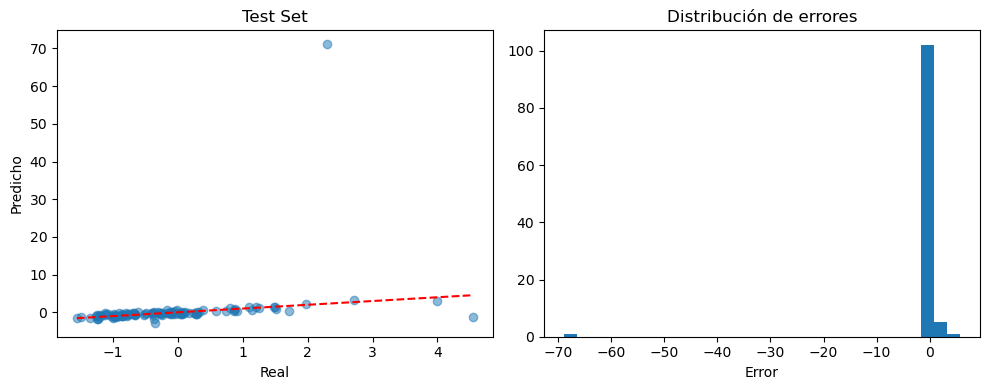


Sin regularización (test): -39.6767


In [14]:
# Añade esto después de tu código para diagnosticar:

print("\n=== DIAGNÓSTICO ===")
print(f"Mejor alpha: {elastic_net.alpha_}")
print(f"Mejor l1_ratio: {elastic_net.l1_ratio_}")
print(f"Features activas: {n_features}/{X_train.shape[1]}")
print(f"Train explained var: {explained_var:.4f}")
print(f"Test explained var: {explained_var_test:.4f}")

# Ver distribución de predicciones
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(Y_test_scaled, Y_pred_test, alpha=0.5)
plt.plot([Y_test_scaled.min(), Y_test_scaled.max()], 
         [Y_test_scaled.min(), Y_test_scaled.max()], 'r--')
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Test Set')

plt.subplot(1,2,2)
plt.hist(Y_test_scaled - Y_pred_test, bins=30)
plt.xlabel('Error')
plt.title('Distribución de errores')
plt.tight_layout()
plt.show()

# Probar sin regularización
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train_scaled)
print(f"\nSin regularización (test): {lr.score(X_test_scaled, Y_test_scaled):.4f}")

In [15]:
np.argmax(abs(Y_test_scaled - Y_pred_test))

44

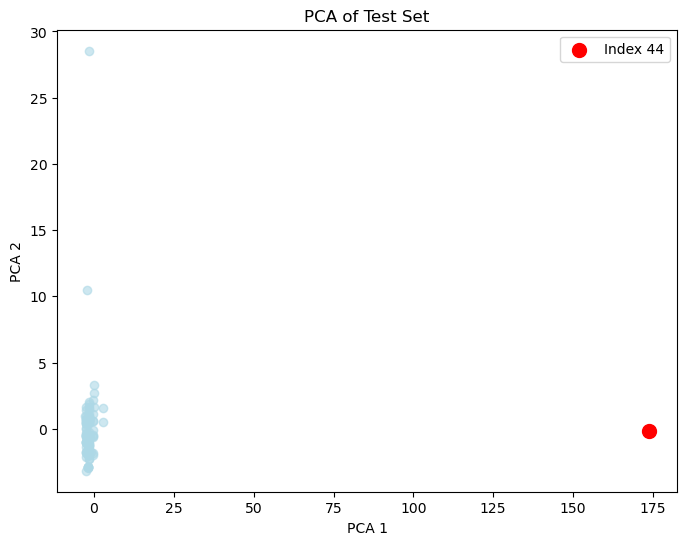

In [16]:
#PCA of X_scales and color different value in index 65
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c='lightblue', alpha=0.6)
plt.scatter(X_pca[44,0], X_pca[44,1], c='red', s=100, label='Index 44')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Test Set')
plt.legend()
plt.show()

In [17]:
#correlation between each column in X_test_scaled and PCA_1 and select the highest
correlations = []
for i in range(X_test_scaled.shape[1]):
    corr = np.corrcoef(X_test_scaled[:, i], X_pca[:, 0])[0, 1]
    correlations.append(corr)
max_corr_index = np.argmax(correlations)
print("Max correlation between X_test_scaled[:, {}] and PCA_1: {}".format(max_corr_index, correlations[max_corr_index]))


Max correlation between X_test_scaled[:, 6] and PCA_1: 0.9999888247998343


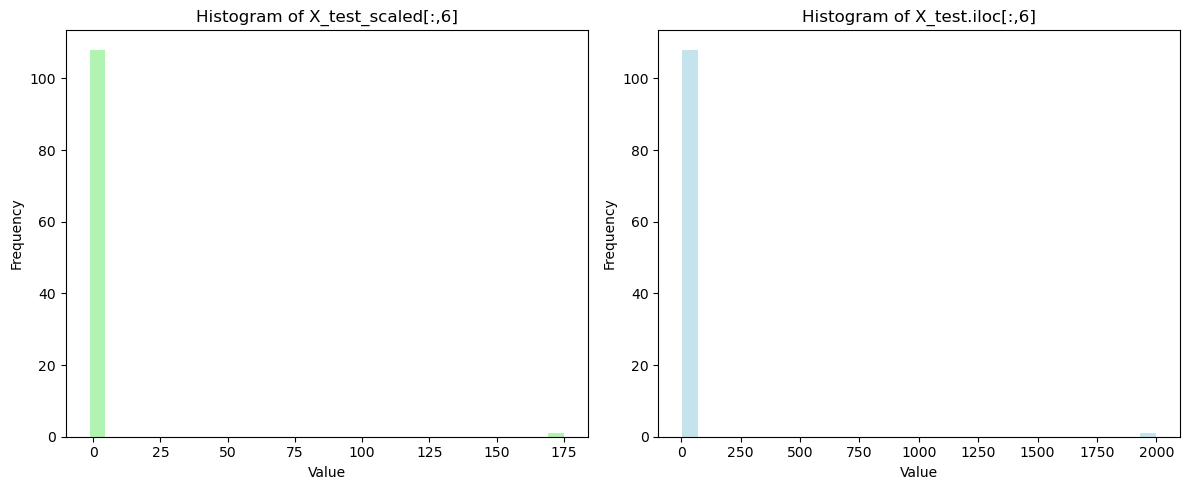

In [18]:
#histogram of X_test_scales[:,6] and X_test[:,6] in two graphs in the same plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(X_test_scaled[:,6], bins=30, color='lightgreen', alpha=0.7)
plt.title('Histogram of X_test_scaled[:,6]')
plt.xlabel('Value')
plt.ylabel('Frequency') 
plt.subplot(1,2,2)
plt.hist(X_test.iloc[:,6], bins=30, color='lightblue', alpha=0.7)
plt.title('Histogram of X_test.iloc[:,6]')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()  

In [19]:
#remove from X_test_scaled and Y_test_scales the row with index 44
X_test_scaled = np.delete(X_test_scaled, 44, axis=0)
Y_test_scaled = np.delete(Y_test_scaled, 44, axis=0)

Y_pred_test = elastic_net.predict(X_test_scaled)
explained_var_test = explained_variance_score(Y_test_scaled, Y_pred_test)
#spearman correlation between test and predicted test
corr_test = spearmanr(Y_test_scaled, Y_pred_test)[0]

betas = elastic_net.coef_
n_features = sum(abs(betas)>0)


print('Explained Variance in test:',explained_var_test)
print('Correlation in test:',corr_test)
print("Number of features with ElasticNet: ", n_features)

Explained Variance in test: 0.5011844827003045
Correlation in test: 0.7762913141265398
Number of features with ElasticNet:  14


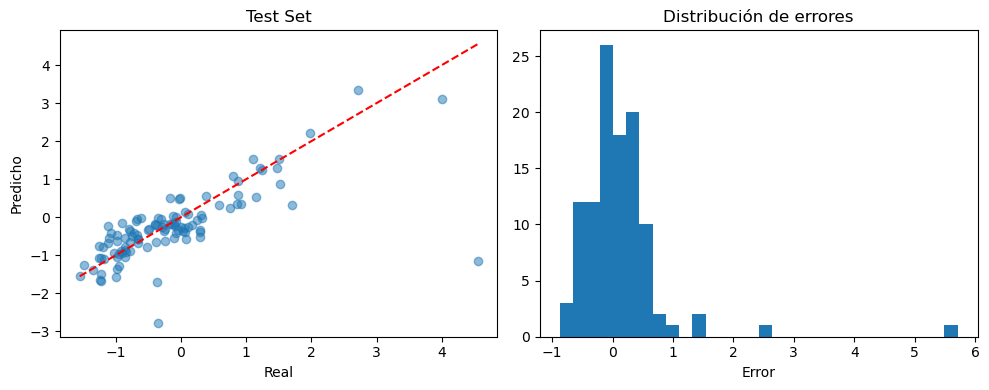


Sin regularización (test): 0.4890


In [20]:
# Ver distribución de predicciones
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(Y_test_scaled, Y_pred_test, alpha=0.5)
plt.plot([Y_test_scaled.min(), Y_test_scaled.max()], 
         [Y_test_scaled.min(), Y_test_scaled.max()], 'r--')
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Test Set')

plt.subplot(1,2,2)
plt.hist(Y_test_scaled - Y_pred_test, bins=30)
plt.xlabel('Error')
plt.title('Distribución de errores')
plt.tight_layout()
plt.show()

# Probar sin regularización
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train_scaled)
print(f"\nSin regularización (test): {lr.score(X_test_scaled, Y_test_scaled):.4f}")

# Ex3 (3 points): 

- Apply K-means clustering without using price.
- To select the number of clusters, use the Silhouette index.
- Plot Silhouette index for different K values
- Consider the complexity of the solution to select K
- visualize groups with PCA

In [21]:
X= data3.drop(['price_eur'], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [22]:
nclusters = 20
Nc = range(2, nclusters + 1)
silhouette = np.zeros(nclusters-1)

for i in Nc:
    
    cluster1 = KMeans(n_clusters=i, n_init="auto", random_state=10)
    labels = cluster1.fit_predict(X)
    silhouette[i-2] = silhouette_score(X, labels)


silhouette = np.asarray(silhouette)



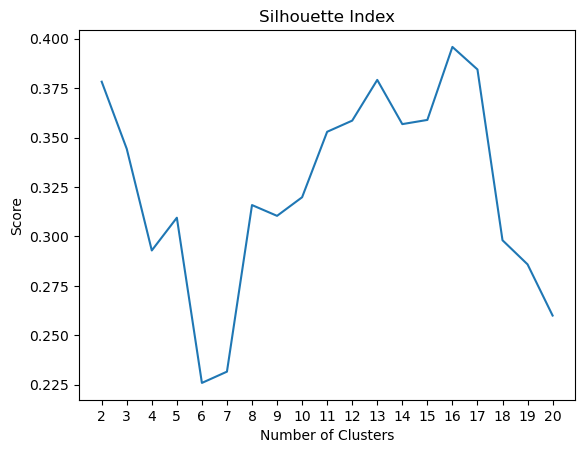

15

In [23]:
plt.plot(Nc,silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
x = np.linspace(2,nclusters,nclusters-1)
plt.xticks(x)
plt.title('Silhouette Index')
plt.show()


K = silhouette.argmax()+1
K


In [24]:
clustersol = KMeans(n_clusters=K, n_init="auto", random_state=10)
labelsol = clustersol.fit_predict(X)
labelsol = labelsol + 1
labelsol = pd.DataFrame(data = labelsol, columns = ['Label_clust'])


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


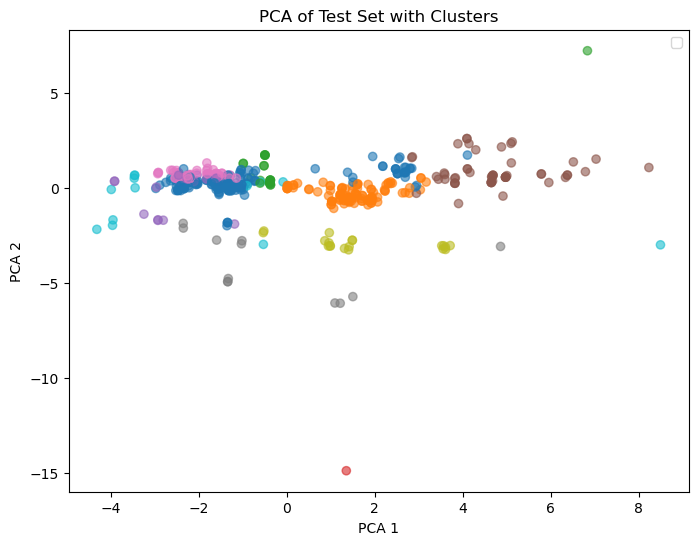

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labelsol["Label_clust"], cmap='tab10', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Test Set with Clusters')
plt.legend()
plt.show()  